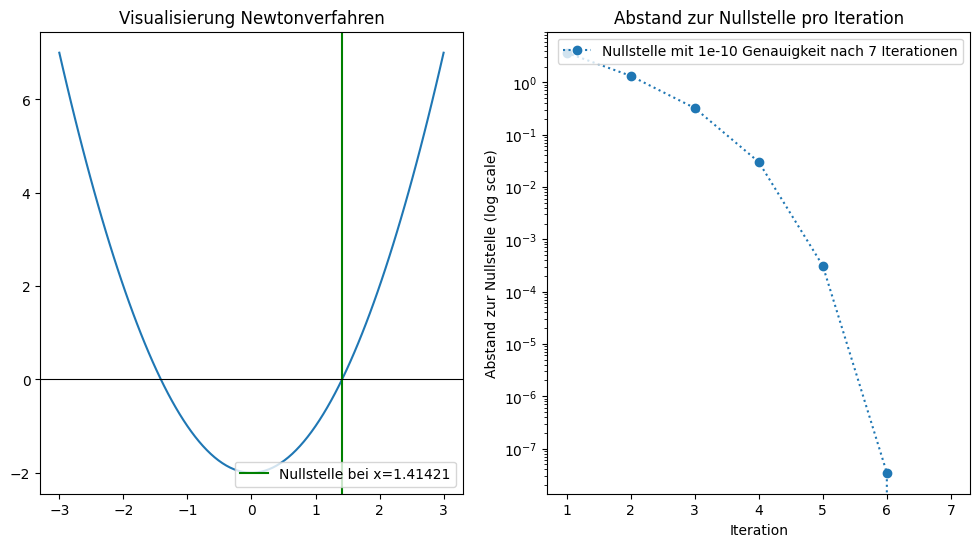

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 - 2

def df(x):
    return 2*x

test_n = np.linspace(-3, 3, 100)
# print(test_n)

test_y = []

for n in test_n:
    y = f(n)
    test_y.append(y)

# print(test_y)

count = 0
limit = 100

x_alt = 10

x_neu_array = []

while count < limit:
    #print(x_alt, f(x_alt), df(x_alt))
    x_neu = x_alt - f(x_alt) / df(x_alt)
    x_alt = x_neu
    #print(x_neu, f(x_neu))
    x_neu_array.append(x_neu)
    if f(x_neu) < 1e-10:
        break
    count += 1 

x_abstaende = []
     
#print(x_neu_array)

for x in x_neu_array:
    x_abstaende.append(abs(x_neu_array[-1] - x))

#print(x_abstaende)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(test_n, test_y)
ax[0].set_title("Visualisierung Newtonverfahren")
ax[0].axvline(x=x_neu, color= "green", label=f"Nullstelle bei x={x_neu:.5f}")
ax[0].axhline(y=0, color= "black", lw= 0.8)
ax[0].legend(loc="lower right")

ax[1].plot(np.arange(1, count+2), x_abstaende, "o:", label="Nullstelle mit 1e-10 Genauigkeit nach {} Iterationen".format(count+1))
ax[1].set_yscale("log", base=10)
ax[1].set_title("Abstand zur Nullstelle pro Iteration")
ax[1].set_xlabel("Iteration")
ax[1].set_ylabel("Abstand zur Nullstelle (log scale)")
ax[1].legend(loc="upper right")

plt.show()

In [99]:
# Vibe coded animation of the Newton's method

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

def f(x):
    return x**2 - 2

def df(x):
    return 2*x

x_plot = np.linspace(-1, 6, 100)
y_plot = f(x_plot)
# print(test_n)

x_start = 5
history = [x_start]
x_curr = x_start

count = 0
limit = 100

for i in range(limit):
    x_new = x_curr - f(x_curr) / df(x_curr)
    history.append(x_new)
    if abs(f(x_new)) < 1e-10:
        break
    x_curr = x_new


fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(x_plot, y_plot, "b-")
ax.set_xlim(-1, 6)
ax.set_ylim(-3, 30)
ax.set_title("Visualisierung Newtonverfahren")
ax.grid(True, ls="--", alpha=0.6)

line_tangent, = ax.plot([], [], 'r--', label='Tangente') # Red dashed line
line_vertical, = ax.plot([], [], 'g:', alpha=0.6)        # Green dotted line
point_current, = ax.plot([], [], 'ro')

text_info = ax.text(0.05, 0.95, '', transform=ax.transAxes, verticalalignment='top')

def update(frame):

    if frame >= len(history) - 1:
        return
    
    x_n = history[frame]
    x_next = history[frame+1]
    y_n = f(x_n)

    line_vertical.set_data([x_n, x_n], [0, y_n])

    x_tangent_range = [x_next, x_n + 0.5]
    y_tangent_range = [0, y_n + df(x_n)*(0.5)]

    line_tangent.set_data([x_n, x_next], [y_n, 0])

    point_current.set_data([x_n], [y_n])

    text_info.set_text(f"Step {frame}: x = {x_n:.4f}")

    return line_tangent, line_vertical, point_current, text_info

ani = animation.FuncAnimation(fig, update, frames=len(history)-1, interval=1500, repeat=True)

plt.close()
HTML(ani.to_jshtml())